<a href="https://colab.research.google.com/github/Sylvesterchuks/us_accidents_data/blob/main/us_accident_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accident-analysis')
jovian.set_colab_id('18KlGS8pBSXAybmMxgcCxsuX3bHgioPER')

     |████████████████████████████████| 68 kB 2.7 MB/s 


# us-accident-analysis

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet   

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accident-analysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sylvesterchuks/us-accident-analysis


'https://jovian.ai/sylvesterchuks/us-accident-analysis'

# Exploratory Data Analysis
* Todo - talk about EDA
* Todo - talk about the dataset(source and relability)
    * Kaggle
    * information about accidents in the United states
    * can be implemented to reduce accidents in USA

In [ ]:
pip install opendatasets --upgrade

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: okaforchukwuka
Your Kaggle Key: ··········


100%|██████████| 290M/290M [00:08<00:00, 37.1MB/s]

## Assign the data to a variable

In [ ]:
us_accidents_data = './us-accidents/US_Accidents_Dec20_Updated.csv'

## Import the Python Libraries needed for data preprocessing
* import pandas, numpy
  1. Read the us_accidents_data using pandas
  2. View the data(Data overview)
  3. cleanup the data
  4. work on missing values


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_accidents = pd.read_csv(us_accidents_data)
df_accidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
num_of_numerical_columns = [column for column in df_accidents.columns if df_accidents[column].dtype in ['int64','float64']]
len(num_of_numerical_columns)

14

In [ ]:
df_accidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


## Data preparation and cleaning

In [ ]:
# Dealing with missing values

In [ ]:
total = np.product(df_accidents.shape)
print(total)

136610670


In [ ]:
# total missing value
print(f'Total missing value: {sum(df_accidents.isnull().sum())}')

Total missing value: 5711084


In [ ]:
# percentage of total missing value
print(f'Percentage of total missing value: {sum(df_accidents.isnull().sum())/total*100}%')

Percentage of total missing value: 4.1805548570986435%


In [ ]:
col_total = df_accidents.shape[0]

In [ ]:
# check what columns are having missing data and what percentage
missing_value = df_accidents.isnull().sum()
missing_value


ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [ ]:
# percentage of missing data in each column
for column in df_accidents.columns:
  percent_of_value = df_accidents[column].isnull().sum()/col_total
  print(f'{column} : {percent_of_value}%')

ID : 0.0%
Severity : 0.0%
Start_Time : 0.0%
End_Time : 0.0%
Start_Lat : 0.0%
Start_Lng : 0.0%
End_Lat : 0.09730269970859523%
End_Lng : 0.09730269970859523%
Distance(mi) : 0.0%
Description : 0.0%
Number : 0.6508172751074276%
Street : 0.0%
Side : 0.0%
City : 3.715668768771868e-05%
County : 0.0%
State : 0.0%
Zipcode : 0.0003832643526307279%
Country : 0.0%
Timezone : 0.001180068877489584%
Airport_Code : 0.002273438817041158%
Weather_Timestamp : 0.016141484409673123%
Temperature(F) : 0.023127973825177783%
Wind_Chill(F) : 0.4072988808268051%
Humidity(%) : 0.02451997343984917%
Pressure(in) : 0.01957882206419162%
Visibility(mi) : 0.02479796051069803%
Wind_Direction : 0.021837811058243107%
Wind_Speed(mph) : 0.1056774042613216%
Precipitation(in) : 0.44771262742507595%
Weather_Condition : 0.024719862657872918%
Amenity : 0.0%
Bump : 0.0%
Crossing : 0.0%
Give_Way : 0.0%
Junction : 0.0%
No_Exit : 0.0%
Railway : 0.0%
Roundabout : 0.0%
Station : 0.0%
Stop : 0.0%
Traffic_Calming : 0.0%
Traffic_Signal :

In [ ]:
len(df_accidents)

2906610

## Exploratory analysis and visualization
Pick and work with some columns
* city
* temperature
* weather_condition
* Airport_code

In [ ]:
df_accidents.City.nunique()

11789

In [ ]:
num_accident_per_city = df_accidents.City.value_counts()
num_accident_per_city[:40]

Los Angeles        68411
Houston            68265
Charlotte          56176
Miami              49965
Dallas             48525
Austin             38808
Raleigh            31355
Atlanta            29244
Sacramento         28984
Orlando            28092
Nashville          25277
Baton Rouge        25080
Minneapolis        22469
San Diego          22329
Phoenix            21370
Oklahoma City      21292
Portland           19432
Richmond           18343
Seattle            17384
Saint Paul         17266
San Jose           16744
Chicago            16571
Jacksonville       16210
San Antonio        15751
Denver             14272
Indianapolis       13671
Tucson             13526
Columbia           13326
Greenville         12925
Riverside          12359
Oakland            12170
Tampa              11758
Rochester          11715
Detroit            10909
Fort Lauderdale    10764
Kansas City        10636
Omaha              10568
Salt Lake City     10532
Dayton             10236
Bronx               9962


In [ ]:
num_accident_per_city[num_accident_per_city.index == 'New York']

New York    7328
Name: City, dtype: int64

In [ ]:
num_accident_per_state = df_accidents.State.value_counts()
num_accident_per_state[:20]

CA    730744
FL    263300
TX    226640
NY    126176
NC    122797
SC    120462
OR     98352
PA     89745
VA     89730
MN     79712
IL     77626
GA     69536
MI     67073
AZ     61707
TN     55495
MD     52755
NJ     50214
LA     50103
WA     49455
OH     47836
Name: State, dtype: int64

In [ ]:
df_accidents.State.unique()

array(['SC', 'NC', 'CA', 'NV', 'FL', 'CO', 'TN', 'NY', 'TX', 'AZ', 'NJ',
       'MI', 'GA', 'VA', 'IN', 'LA', 'PA', 'MN', 'OH', 'MD', 'CT', 'IL',
       'MO', 'OR', 'NE', 'OK', 'UT', 'WA', 'AL', 'WI', 'MA', 'DC', 'MS',
       'KS', 'KY', 'ME', 'IA', 'WV', 'AR', 'ID', 'RI', 'WY', 'NM', 'MT',
       'NH', 'DE', 'ND', 'SD', 'VT'], dtype=object)

In [ ]:
'SC' in df_accidents.State.values

True

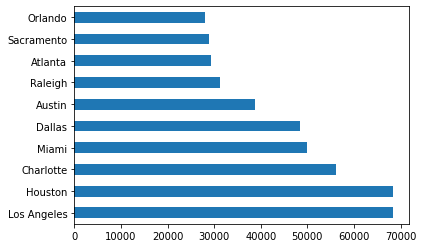

In [ ]:
num_accident_per_city[:10].sort_values(ascending=False).plot(kind='barh')

### Accident Start Time

In [ ]:
accidents_start_time = pd.to_datetime(df_accidents.Start_Time)
accidents_start_time

0         2019-05-21 08:29:55
1         2019-10-07 17:43:09
2         2020-12-13 21:53:00
3         2018-04-17 16:51:23
4         2016-08-31 17:40:49
                  ...        
2906605   2018-06-28 08:49:01
2906606   2019-01-10 02:01:01
2906607   2020-11-23 12:52:00
2906608   2019-12-29 22:38:00
2906609   2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: datetime64[ns]

In [ ]:
accidents_by_hour = accidents_start_time.dt.hour
accidents_by_hour

0           8
1          17
2          21
3          16
4          17
           ..
2906605     8
2906606     2
2906607    12
2906608    22
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

In [ ]:
accidents_by_day = accidents_start_time.dt.day
accidents_by_day

0          21
1           7
2          13
3          17
4          31
           ..
2906605    28
2906606    10
2906607    23
2906608    29
2906609    26
Name: Start_Time, Length: 2906610, dtype: int64

In [ ]:
accidents_by_weekday = accidents_start_time.dt.week
accidents_by_weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


0          21
1          41
2          50
3          16
4          35
           ..
2906605    26
2906606     2
2906607    48
2906608    52
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

In [ ]:
accidents_by_dayname = accidents_start_time.dt.day_name()
accidents_by_dayname

0            Tuesday
1             Monday
2             Sunday
3            Tuesday
4          Wednesday
             ...    
2906605     Thursday
2906606     Thursday
2906607       Monday
2906608       Sunday
2906609       Monday
Name: Start_Time, Length: 2906610, dtype: object

In [ ]:
import seaborn as sns

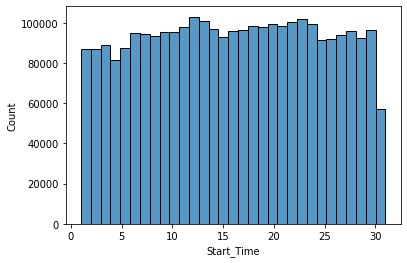

In [ ]:
# frequency of Accidents according to day
sns.histplot(accidents_by_day,bins=31)

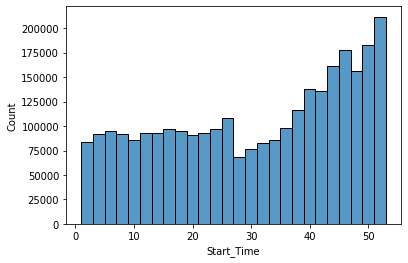

In [ ]:
# frequency of Accidents according to week
sns.histplot(accidents_by_weekday,bins=26)

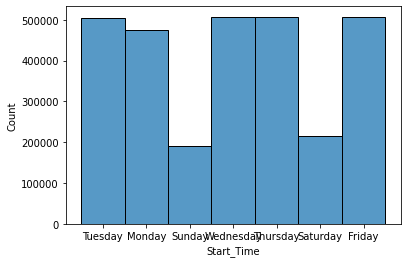

In [ ]:
sns.histplot(accidents_by_dayname,bins=7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


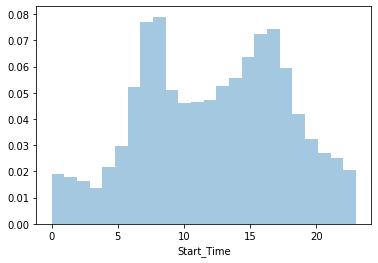

In [ ]:
sns.distplot(accidents_by_hour,bins=24, ,norm_hist=True,kde=False)

In [ ]:
sunday = accidents_start_time[accidents_start_time.dt.day_name() == 'Sunday'].dt.hour

In [ ]:
saturday = accidents_start_time[accidents_start_time.dt.day_name() == 'Saturday'].dt.hour

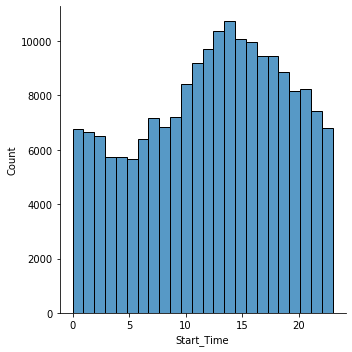

In [ ]:
sns.displot(sunday,bins=24)

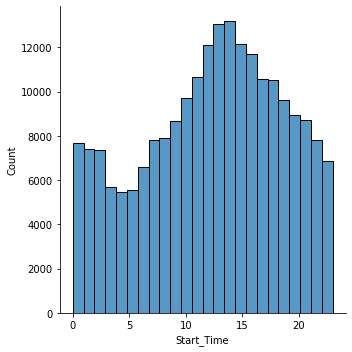

In [ ]:
sns.displot(saturday,bins=24)

### A scatter plot for the areas with the highest accident occurance rate

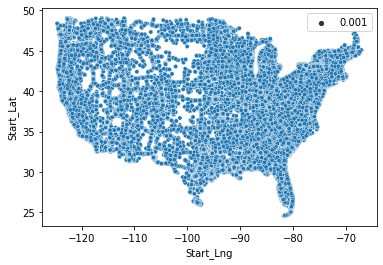

In [ ]:
sns.scatterplot(x=df_accidents.Start_Lng,y=df_accidents.Start_Lat,size=0.001)

## Get Insights, Ask and Answer Questions

Insight
  * New york on of the most populated city in USA have low accident rate
  * number of accidents decrease exponentially
  *some cities only have one accident record

Questions:
  * Are there more accidents in warmer or colder areas?
  * Which 5 States have the highest number of accidents? What is there current population and the GDP capital
  * Why is New York accident rate small
  + Which state have the most frequent city amongst the top 100
  * What time of the day do most accident occur
  * which days of the week have the most frequent occurance
  * month with the highest number of occurance 

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sylvesterchuks/us-accident-analysis


'https://jovian.ai/sylvesterchuks/us-accident-analysis'